Class: INFO 2950

Assignment: Final Project

Group: Ben Stewart (bls245), Carter Wein (cdw99), and Jack Pilon (jlp367)

# Part I: Introduction

Released in August of 2012, Counter-Strike: Global Offensive, commonly referred to as CS:GO, is a first-person shooter video game that has achieved global success. While there are many shooters on the market, CS:GO sets itself apart with its online marketplace. Like many games of this type, players are able to buy “crates” that contain a random variety of in-game loot or have the option to purchase items directly in the online shop. Though primarily cosmetic in function, weapon “skins,” which add patterns and designs to the virtual weapons, are heavily sought-after items in the marketplace. As strange as it sounds, some of these skins can fetch a very high price. In 2018, the game made major news headlines when one skin sold for over $61,000 online. This online market has become a platform for players to buy, sell, and trade skins for real-world monetary gain. In this project, our team’s goal was to develop a model that analyzes the different variables affecting the price of these skins, and why some weapons fetch a higher price than others. The results were surprising, as the model not only found distinct differences between weapon types and price, but different patterns of variables that led to higher or lower prices.


# Part II: Data Description

To formulate our dataset, we scraped the data of thousands of virtual skins available on the CS:GO marketplace. The observations are individual skins, and the columns are the attributes associated with each skin. For example, one observation might be an AK-47 with the Jaguar skin. Its attributes, represented by the columns of the dataset, are its quality, rarity, StatTrak status, quantity available on the market, category of weapon, and price. 

The website that our data was scraped from is called www.csgolist.com. There are many other sites like it, and they are all primarily made for CS:GO players to track the price of skins, as well as provide a platform for buying, selling, and trading. According to the www.csgolist.com’s footer, the website was “all made with a passion for CS:GO” and funded by donations from the site’s users. We specifically chose this site because it contains real time data for every weapon in the game which ensured all data was current and uniformly dated. We collected this data to determine why some skins demand such a high price and discover which factors have the greatest influence on a skin’s price. In taking this analysis a step further, it could be possible to predict the prices of new skins before they are released and even determine a market strategy that could be used to trade skins for a profit. 

The most important process that influenced the data we collected is the dynamic nature of the CS:GO marketplace. All of our data was recorded on May 6th, so all of our observations are representative of the market on that day. The prices of items and their availability are constantly fluctuating, so any changes in the market after that date are not reflected in our dataset. Unfortunately, this means that our dataset cannot be used to determine how item prices change over time or why. While this would be useful data to have, there are a number of unquantifiable outside factors that can affect prices over time which would be impossible to explain in a model.

In order to obtain the final dataset that we used in our analysis, a significant amount of time-consuming preprocessing was necessary. As mentioned previously, our data was scraped directly from the internet which presented us with a number of challenges. Iterating properly through the html tables on each page without skipping over any observations was our first concern. The tables that we were targeting were sometimes housed within different html elements, so some observations were skipped over entirely in the beginning of the data collection process. At this stage, properly denoting a weapon’s StatTrak status was also impossible, until we spotted a nuance in the html that allowed us to separate standard weapons from StatTrak.

Once we were sure that we had collected our observations properly, cleaning our data entries came next. A number of weapon and skin names contained extraneous whitespace or special characters and broke our code a number of times. Pinpointing the exact source of the crash was always difficult, since we had collected more than 9000 data points. With some debugging and several revisions, our code was eventually able to clean the data properly. After this point, we used maps to quantify the categorical variables of quality and rarity so that they could be used in regression analysis. At the very end, we added another column called “category” to our dataset that would list which kind of weapon a specific data entry was.

The website that all of our data was collected from can be found at www.csgolist.com, and the specific web pages containing the exact data we used for this project are stored in the “html-data-generation” folder in our project’s GitHub repository.

# Part III: Data Analysis

The data analysis section is broken into 3 parts, each with a specific purpose in analyzing the data. Section 1 aims to provide a general overview of the results by using averages, while Section 2 and Section 3 use linear regressions to analyze the different attributes and their correlation to price. The goal of our analysis is to provide an in-depth model that can identify which skin attributes correlate to higher prices.

**Section 1: Data Set-up and Large-Scale Visualization**

One of our first goals was to capture a visualization of the entire dataset -- this would help give us a rough idea of how the prices are spread before we broke the dataset down into many Linear Regression models. However, our dataset has a lot of categorical variables which makes it hard to fit everything onto one graph. This section explores the methods we used to generate a big-picture view of our dataset. We used the data-visualization library "Seaborn" (https://seaborn.pydata.org/index.html) which is built on matplotlib.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
import seaborn as sns 
## This library is Seaborn -- it can be installed via "pip install seaborn"
## It's a data visualization tool that builds off matplotlib. We only used it in this section.
sns.set(style="ticks", color_codes=True)

In [4]:
weapons = pd.read_csv("datasets-and-data-cleaning/categorical-data-clean.csv")
del (weapons["Unnamed: 0"])
weapons.head()

gun             skin  rarity  stattrak  quality  price  quantity category
0  AK-47   Point Disarray       5         0        5  45.05      44.0    rifle
1  AK-47   Point Disarray       5         0        4  31.35      81.0    rifle
2  AK-47   Point Disarray       5         0        3  19.59     122.0    rifle
3  AK-47   Point Disarray       5         0        2  22.82      17.0    rifle
4  AK-47   Point Disarray       5         0        1  16.42      40.0    rifle

The dataset above is the product of the file "categorical-dataset-cleaner", which took in the original dataset generated from our HTML scraping, cleaned it up, and added a "category" column. Here is a brief description of what each column in this dataset means:

- **Gun**: The weapon that the skin belongs to.

- **Skin**: The name of the skin.

- **Rarity**: A range from 1 - 6 that represents the skin's level of rarity. 1 is the most common type of skin and 6 is the rarest.

- **StatTrak**: StatTrak is a property of a skin that keeps track of how many kills a player has gotten with that skin. When a player pays to open a crate to receive a skin, there is a small chance that their skin will have the StatTrak property. This is a binary feature of our data. 0 means that the skin does not have the Stattrak feature. 1 means that the skin does have the Stattrak feature.

- **Quality**: When a player receives a skin for a weapon, the skin is also assigned a quality level that ranges from 1 - 5. 5 is the highest quality a skin can have; this means that it appears bright and fully-colored on the weapon. A 1 indicates that the skin isn't fully colored-in or appears faded on the weapon.

- **Price**: This is the price that the skin is currently selling for on the market. 

- **Quantity**: This is how many skins of the exact same properties (StatTrak, quality, etc.) are listed on the market currently.

- **Category**: This represents what classification each gun falls under. For example, the "AK-47" and "AUG" are both in the "rifles" category. 


In this dataset, there can be up to 5 different instances of the same skin because of its different quality levels, each of which can sell for different prices. For example, as shown in the cell above, a non-StatTrak "Point Disarray" skin for the AK-47 sells for \$45.05 if its Quality is 5 (Factory New), but only sells for \$16.42 if its Quality is 1 (Battle-Scarred). Having many instances of the same skin made it hard to visualize the dataset on a larger scale. To simplify the dataset we created another cleaning file that averages out the prices of one skin's various quality levels. This dataset with average prices is what we load in the cell below.

In [3]:
weapons_avg = pd.read_csv("datasets-and-data-cleaning/average-price-data-clean.csv")
del (weapons_avg["Unnamed: 0"]) # Deleting unwanted column
weapons_avg.head()

gun             skin  rarity  stattrak  avg-price category
0  AK-47   Point Disarray       5         0  27.046001    rifle
1  AK-47   Point Disarray       5         1  69.606003    rifle
2  AK-47    Blue Laminate       4         0   8.322500    rifle
3  AK-47    Blue Laminate       4         1  25.054998    rifle
4  AK-47           Vulcan       6         0  83.848000    rifle

In this dataset, each row represents one skin, the gun it belongs to, the skin's rarity level (1 = least rare and 6 = the rarest), whether or not it is StatTrak (0 = Not StatTrak, 1 = StatTrak), and the skin's average price. If you want to see how we aggregated this new dataset, look at the file "average-price-dataset-cleaner.ipynb" in the folder "datasets-and-data-cleaning" on our Github.

From here, we used the data-visualization library Seaborn to create some interesting graphs that capture a big-picture view of our entire dataset. This helped us wrap our heads around what we were working with before we dove into analyzing specific Linear Regression models. 

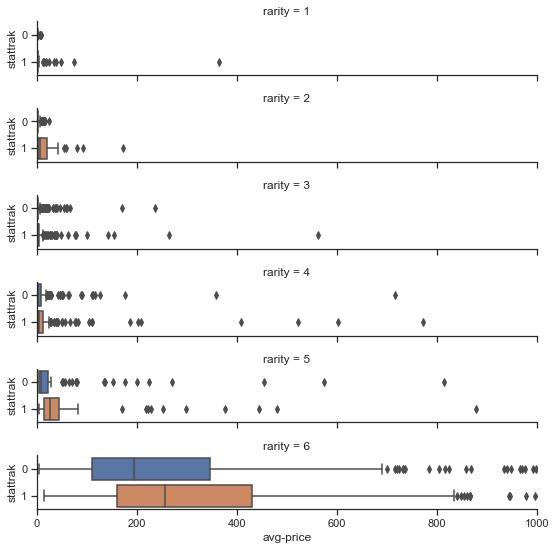

In [11]:
g = sns.catplot(x="avg-price", y="stattrak", row="rarity",
                kind="box", orient="h", height=1.3, aspect=6,
                data=weapons_avg)
g.set(xlim=(0,1000));

Each layer of chart represents a different rarity level across all the weapons we analyzed. They range from 1 (the least rare) to 6 (the rarest). The x-axis is price in dollars -- the exact price labels are on the far bottom. Keep in mind that each box represents the spread of average prices for every skin belonging to that rarity level.

Within each rarity level, the boxes are distinguished by whether or not the skins have StatTrak. This is simply binary -- a "0" indicates that a skin does not have stattrak (these are the blue boxes). Skins that do have the StatTrak feature are represented by the orange boxes.

This graph showed us just how wide the range of prices are spread in our dataset. The highest level of rarity, 6, sells on average for so much more than the other levels that it made the lower rarities nearly impossible to accurately compare. Therefore, we decided to create the same chart but mapped to a log-scale.

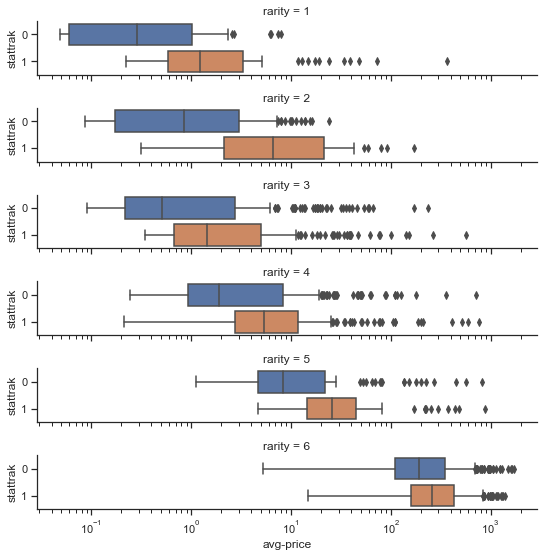

In [153]:
g = sns.catplot(x="avg-price", y="stattrak", row="rarity",
                kind="box", orient="h", height=1.3, aspect=6,
                data=weapons_avg)
g.set(xscale="log");

This is the same box-plot but mapped to a log-scale on the x-axis (price). The value of some skins range from just a few cents to well over $1,000, so using a log-scale helped us read and analyze the larger trends between each rarity level.

This box-plot makes it far more clear that within every rarity level, skins with Stattrak are worth more than non-Stattrak. Furthermore, this chart shows that skins with higher rarity levels have higher average prices. It's also interesting to note that the StatTrak skins in one rarity level often sell for an equal or higher average price than non-StatTrak skins in a higher rarity level. For example, StatTrak skins at the lowest rarity level sell for a higher average price than non-StatTrak skins in the 2nd lowest rarity level. 

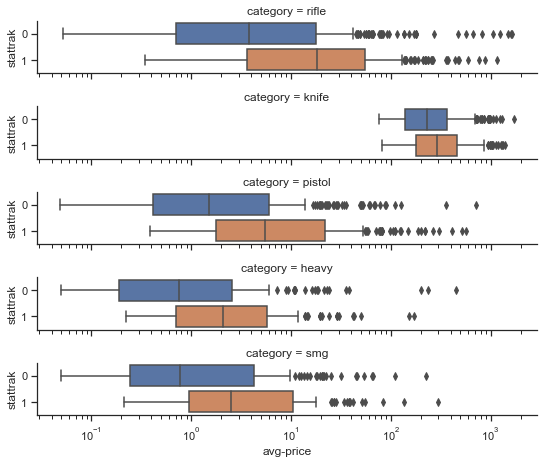

In [138]:
g = sns.catplot(x="avg-price", y="stattrak", row="category",
                kind="box", orient="h", height=1.3, aspect=6,
                data=weapons_avg)
g.set(xscale="log");

This is a similar boxplot that breaks down the spread of average prices by weapon category and whether or not the skins in that category are StatTrak. Across the entire dataset, it appears that the "rifle" and "knife" categories have the highest average skin prices. Just like the previous graph, it appears that skins with StatTrak are on average more valuable than their non-stattrak counterparts. 

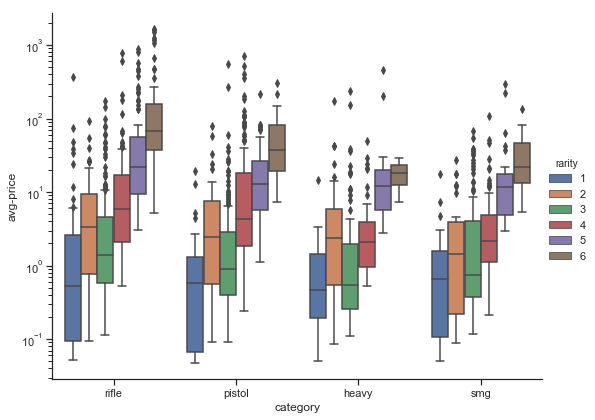

In [10]:
r = sns.catplot(x="category", y="avg-price", hue="rarity", kind="box", height=6, aspect=1.3, data=weapons_avg.query("category != 'knife'"))
r.set(yscale="log");

This view of the dataset separates the rarity levels among each type of weapon and maps where their average prices fall. It appears that across all weapon categories, each incremental rarity level corresponds to a higher price. Based off the previous charts, this does not come as a surprise.

Creating these charts helped us greatly in visualizing the general trends that our dataset has. Before we even created Linear Regression models to analyze this data further, these charts allowed us to make some key inferences:
- Stattrak skins on average sell for more than non-Stattrak skins.
- Higher rarity levels appear to be correlated with higher prices.
- While each weapon category has a large spread of prices, it appears that skins for Knives and Rifles sell for the most on average. 

After visualizing and discovering these basic properties of our dataset, we then started building Linear Regression models to cross-compare our dataset's variables. 

**Section 2: Attributes and Correlation to Price**

This section contains five sub-sections, each focused on the analysis of one attribute and its corresponding correlation with price. The five attributes being analyzed are quality, rarity, StatTrak, quantity, and weapon type. Below are the first five rows of the dataset used for Section 2’s analysis.

In [5]:
weapons = pd.read_csv("datasets-and-data-cleaning/categorical-data-clean.csv")
weapons.head()

Unnamed: 0    gun             skin  rarity  stattrak  quality  price  \
0           0  AK-47   Point Disarray       5         0        5  45.05   
1           1  AK-47   Point Disarray       5         0        4  31.35   
2           2  AK-47   Point Disarray       5         0        3  19.59   
3           3  AK-47   Point Disarray       5         0        2  22.82   
4           4  AK-47   Point Disarray       5         0        1  16.42   

   quantity category  
0      44.0    rifle  
1      81.0    rifle  
2     122.0    rifle  
3      17.0    rifle  
4      40.0    rifle

**Section 2.1: Quality and Price**

In this section, we are analyzing the attribute “quality” and its correlation to price. Like baseball cards, the quality of the skin is essentially its condition. Where baseball cards could be found in “mint” condition, these weapon skins can be obtained in one of five different qualities: factory new, minimal wear, field-tested, well-worn, and battle-scarred (best to worst). Essentially, this section analyzes how the different quality levels can be viewed in correlation to price. 

To begin the analysis, we created a linear regression model to get the coefficient for quality as a predictor variable for price. As seen below, the “quality slope value” was found to be ~22.8, telling us there is a strong positive correlation between the quality of a weapon’s skin and the price. 

In [94]:
quality_model = LinearRegression().fit( weapons[['quality']], weapons[['price']])
print("Quality Slope Value:", quality_model.coef_[0,0])

Quality Slope Value: 22.79831243295503


This is intuitive, as generally mint baseball cards are much more valuable than used cards, so you could imagine the same for weapon skins. However, we wanted to see if there were any differences between the correlation of quality and price when stratifying by weapon type. This would allow our model to see whether the correlation between quality and price for different weapon types (pistols, rifles, SMGs, heavies, and knives) yield different results. Below we have created five new datasets that break down the larger dataset to contain only the rows for certain weapon types, allowing us to calculate the predictor coefficient of quality predicting price for each weapon group. The results are interesting, as the coefficients differed significantly between weapon types. It was observed that heavy guns have the lowest correlation between quality and price (~3.0) while knives have the largest correlation (~66.4).

In [95]:
pistol_and_quality = weapons[weapons.category == 'pistol']
rifle_and_quality = weapons[weapons.category == 'rifle']
smg_and_quality = weapons[weapons.category == 'smg']
heavy_and_quality = weapons[weapons.category == 'heavy']
knife_and_quality = weapons[weapons.category == 'knife']
#pistol_and_quality.head()

In [96]:
pistol_quality_model = LinearRegression().fit( pistol_and_quality[['quality']], pistol_and_quality[['price']])
print("Pistol Quality Slope Value:", pistol_quality_model.coef_[0,0])

rifle_quality_model = LinearRegression().fit( rifle_and_quality[['quality']], rifle_and_quality[['price']])
print("Rifle Quality Slope Value:", rifle_quality_model.coef_[0,0])

smg_quality_model = LinearRegression().fit( smg_and_quality[['quality']], smg_and_quality[['price']])
print("SMG Quality Slope Value:", smg_quality_model.coef_[0,0])

heavy_quality_model = LinearRegression().fit( heavy_and_quality[['quality']], heavy_and_quality[['price']])
print("Heavy Quality Slope Value:", heavy_quality_model.coef_[0,0])

knife_quality_model = LinearRegression().fit( knife_and_quality[['quality']], knife_and_quality[['price']])
print("Knife Quality Slope Value:", knife_quality_model.coef_[0,0])

Pistol Quality Slope Value: 7.258428676920982
Rifle Quality Slope Value: 13.196115805484402
SMG Quality Slope Value: 3.371793010331965
Heavy Quality Slope Value: 3.0392707340324137
Knife Quality Slope Value: 66.3694763321295


Understanding that there are differences in quality and price correlation within weapon types, we wanted to see the correlations of each quality type (factory new, minimal wear, etc.) and price within each weapon type. To do this, we created dummy variables to analyze the different conditions of the quality attribute. Then, we performed more linear regressions to get the correlation coefficients of each quality condition of each gun type as a predictor for price. The results are below.

In [15]:
pistol_quality_dummies = pd.get_dummies(pistol_and_quality['quality'])
rifle_quality_dummies = pd.get_dummies(rifle_and_quality['quality'])
smg_quality_dummies = pd.get_dummies(smg_and_quality['quality'])
heavy_quality_dummies = pd.get_dummies(heavy_and_quality['quality'])
knife_quality_dummies = pd.get_dummies(knife_and_quality['quality'])
#pistol_quality_dummies.head()

In [16]:
#For Qualities Within Pistols

pistol_battlescarred_model = LinearRegression().fit( pistol_quality_dummies[[1]], pistol_and_quality[['price']])
print("Battle-Scarred Pistol Slope:", pistol_battlescarred_model.coef_[0,0])

pistol_wellworn_model = LinearRegression().fit( pistol_quality_dummies[[2]], pistol_and_quality[['price']])
print("Well-Worn Pistol Slope:", pistol_wellworn_model.coef_[0,0])

pistol_fieldtested_model = LinearRegression().fit( pistol_quality_dummies[[3]], pistol_and_quality[['price']])
print("Field-Tested Pistol Slope:", pistol_fieldtested_model.coef_[0,0])

pistol_minimalwear_model = LinearRegression().fit( pistol_quality_dummies[[4]], pistol_and_quality[['price']])
print("Minimal Wear Pistol Slope:", pistol_minimalwear_model.coef_[0,0])

pistol_factorynew_model = LinearRegression().fit( pistol_quality_dummies[[5]], pistol_and_quality[['price']])
print("Factory New Pistol Slope:", pistol_factorynew_model.coef_[0,0])

Battle-Scarred Pistol Slope: -8.022669301988518
Well-Worn Pistol Slope: -11.960831063794691
Field-Tested Pistol Slope: -10.897404320765911
Minimal Wear Pistol Slope: -2.3160014478826976
Factory New Pistol Slope: 30.75879154022547


In [17]:
#For Qualities Within Rifles

rifle_battlescarred_model = LinearRegression().fit( rifle_quality_dummies[[1]], rifle_and_quality[['price']])
print("Battle-Scarred Rifle Slope:", rifle_battlescarred_model.coef_[0,0])

rifle_wellworn_model = LinearRegression().fit( rifle_quality_dummies[[2]], rifle_and_quality[['price']])
print("Well-Worn Rifle Slope:", rifle_wellworn_model.coef_[0,0])

rifle_fieldtested_model = LinearRegression().fit( rifle_quality_dummies[[3]], rifle_and_quality[['price']])
print("Field-Tested Rifle Slope:", rifle_fieldtested_model.coef_[0,0])

rifle_minimalwear_model = LinearRegression().fit( rifle_quality_dummies[[4]], rifle_and_quality[['price']])
print("Minimal Wear Rifle Slope:", rifle_minimalwear_model.coef_[0,0])

rifle_factorynew_model = LinearRegression().fit( rifle_quality_dummies[[5]], rifle_and_quality[['price']])
print("Factory New Rifle Slope:", rifle_factorynew_model.coef_[0,0])

Battle-Scarred Rifle Slope: -19.817787569415852
Well-Worn Rifle Slope: -18.77235105974088
Field-Tested Rifle Slope: -16.528652393596296
Minimal Wear Rifle Slope: 4.425637020393562
Factory New Rifle Slope: 49.889989829101516


In [18]:
#For Qualities Within SMGs

smg_battlescarred_model = LinearRegression().fit( smg_quality_dummies[[1]], smg_and_quality[['price']])
print("Battle-Scarred SMG Slope:", smg_battlescarred_model.coef_[0,0])

smg_wellworn_model = LinearRegression().fit( smg_quality_dummies[[2]], smg_and_quality[['price']])
print("Well-Worn SMG Slope:", smg_wellworn_model.coef_[0,0])

smg_fieldtested_model = LinearRegression().fit( smg_quality_dummies[[3]], smg_and_quality[['price']])
print("Field-Tested SMG Slope:", smg_fieldtested_model.coef_[0,0])

smg_minimalwear_model = LinearRegression().fit( smg_quality_dummies[[4]], smg_and_quality[['price']])
print("Minimal Wear SMG Slope:", smg_minimalwear_model.coef_[0,0])

smg_factorynew_model = LinearRegression().fit( smg_quality_dummies[[5]], smg_and_quality[['price']])
print("Factory New SMG Slope:", smg_factorynew_model.coef_[0,0])

Battle-Scarred SMG Slope: -5.0793239844573375
Well-Worn SMG Slope: -4.438753570965802
Field-Tested SMG Slope: -4.449994937968664
Minimal Wear SMG Slope: -0.5657874227581838
Factory New SMG Slope: 13.543286826459521


In [22]:
#For Qualities Within Heavies

heavy_battlescarred_model = LinearRegression().fit( heavy_quality_dummies[[1]], heavy_and_quality[['price']])
print("Battle-Scarred Heavy Slope:", heavy_battlescarred_model.coef_[0,0])

heavy_wellworn_model = LinearRegression().fit( heavy_quality_dummies[[2]], heavy_and_quality[['price']])
print("Well-Worn Heavy Slope:", heavy_wellworn_model.coef_[0,0])

heavy_fieldtested_model = LinearRegression().fit( heavy_quality_dummies[[3]], heavy_and_quality[['price']])
print("Field-Tested Heavy Slope:", heavy_fieldtested_model.coef_[0,0])

heavy_minimalwear_model = LinearRegression().fit( heavy_quality_dummies[[4]], heavy_and_quality[['price']])
print("Minimal Wear Heavy Slope:", heavy_minimalwear_model.coef_[0,0])

heavy_factorynew_model = LinearRegression().fit( heavy_quality_dummies[[5]], heavy_and_quality[['price']])
print("Factory New Heavy Slope:", heavy_factorynew_model.coef_[0,0])

Battle-Scarred Heavy Slope: -4.562788359788355
Well-Worn Heavy Slope: -2.268921450085824
Field-Tested Heavy Slope: -5.902511268742912
Minimal Wear Heavy Slope: -1.3333994674826617
Factory New Heavy Slope: 13.432552220592898


In [20]:
#For Qualities Within Knives

knife_battlescarred_model = LinearRegression().fit( knife_quality_dummies[[1]], knife_and_quality[['price']])
print("Battle-Scarred Knife Slope:", knife_battlescarred_model.coef_[0,0])

knife_wellworn_model = LinearRegression().fit( knife_quality_dummies[[2]], knife_and_quality[['price']])
print("Well-Worn Knife Slope:", knife_wellworn_model.coef_[0,0])

knife_fieldtested_model = LinearRegression().fit( knife_quality_dummies[[3]], knife_and_quality[['price']])
print("Field-Tested Knife Slope:", knife_fieldtested_model.coef_[0,0])

knife_minimalwear_model = LinearRegression().fit( knife_quality_dummies[[4]], knife_and_quality[['price']])
print("Minimal Wear Knife Slope:", knife_minimalwear_model.coef_[0,0])

knife_factorynew_model = LinearRegression().fit( knife_quality_dummies[[5]], knife_and_quality[['price']])
print("Factory New Knife Slope:", knife_factorynew_model.coef_[0,0])

Battle-Scarred Knife Slope: -111.90878138115599
Well-Worn Knife Slope: -99.37527952803147
Field-Tested Knife Slope: -87.14971569526348
Minimal Wear Knife Slope: 63.29113050581406
Factory New Knife Slope: 218.86836567430606


To conclude the quality analysis, we displayed our findings graphically with five bar charts. Each chart represents the quality conditions’ coefficients as predictors for price for a given weapon type (five weapon types and five corresponding graphs). Interestingly, there is significant variation between weapon types. Some simply show increasing quality with increasing correlation to price. However, this wasn’t always the case. The heavy weapon category, for example, saw that the middle quality (“field-tested” condition) had the lowest correlation to price, not the expected “battle-scarred” condition.

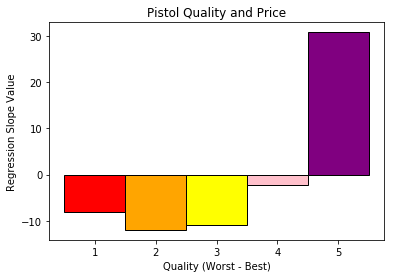

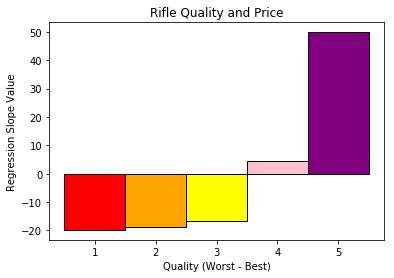

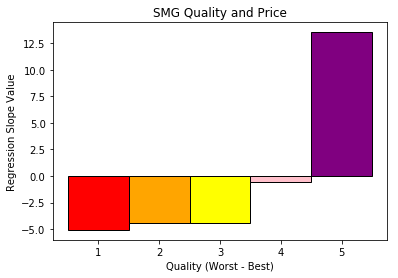

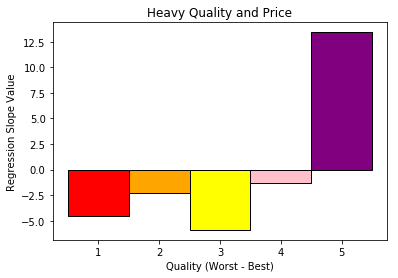

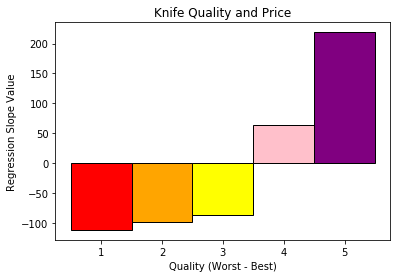

In [25]:
#Graphing Pistol Quality
x = [pistol_battlescarred_model.coef_[0,0], pistol_wellworn_model.coef_[0,0], pistol_fieldtested_model.coef_[0,0], pistol_minimalwear_model.coef_[0,0], pistol_factorynew_model.coef_[0,0]]
y = ["1", "2", "3", "4", "5"]
plt.bar(y, x, width = 1, color= ['red', 'orange', 'yellow', 'pink', 'purple'], edgecolor = "black")
plt.title("Pistol Quality and Price")
plt.xlabel("Quality (Worst - Best)")
plt.ylabel("Regression Slope Value")
plt.show()

#Graphing Rifle Quality
x = [rifle_battlescarred_model.coef_[0,0], rifle_wellworn_model.coef_[0,0], rifle_fieldtested_model.coef_[0,0], rifle_minimalwear_model.coef_[0,0], rifle_factorynew_model.coef_[0,0]]
y = ["1", "2", "3", "4", "5"]
plt.bar(y, x, width = 1, color= ['red', 'orange', 'yellow', 'pink', 'purple'], edgecolor = "black")
plt.title("Rifle Quality and Price")
plt.xlabel("Quality (Worst - Best)")
plt.ylabel("Regression Slope Value")
plt.show()

#Graphing SMG Quality
x = [smg_battlescarred_model.coef_[0,0], smg_wellworn_model.coef_[0,0], smg_fieldtested_model.coef_[0,0], smg_minimalwear_model.coef_[0,0], smg_factorynew_model.coef_[0,0]]
y = ["1", "2", "3", "4", "5"]
plt.bar(y, x, width = 1, color= ['red', 'orange', 'yellow', 'pink', 'purple'], edgecolor = "black")
plt.title("SMG Quality and Price")
plt.xlabel("Quality (Worst - Best)")
plt.ylabel("Regression Slope Value")
plt.show()

#Graphing Heavy Quality
x = [heavy_battlescarred_model.coef_[0,0], heavy_wellworn_model.coef_[0,0], heavy_fieldtested_model.coef_[0,0], heavy_minimalwear_model.coef_[0,0], heavy_factorynew_model.coef_[0,0]]
y = ["1", "2", "3", "4", "5"]
plt.bar(y, x, width = 1, color= ['red', 'orange', 'yellow', 'pink', 'purple'], edgecolor = "black")
plt.title("Heavy Quality and Price")
plt.xlabel("Quality (Worst - Best)")
plt.ylabel("Regression Slope Value")
plt.show()

#Graphing Knife Quality
x = [knife_battlescarred_model.coef_[0,0], knife_wellworn_model.coef_[0,0], knife_fieldtested_model.coef_[0,0], knife_minimalwear_model.coef_[0,0], knife_factorynew_model.coef_[0,0]]
y = ["1", "2", "3", "4", "5"]
plt.bar(y, x, width = 1, color= ['red', 'orange', 'yellow', 'pink', 'purple'], edgecolor = "black")
plt.title("Knife Quality and Price")
plt.xlabel("Quality (Worst - Best)")
plt.ylabel("Regression Slope Value")
plt.show()

**Section 2.2: Rarity and Price**

This section will analyze the “rarity” attribute and its correlation to weapon skin prices. The rarity attribute is divided into six levels: covert, classified, restricted, mil-spec, industrial grade, and consumer grade. Where “covert” is the most rare, and “consumer grade” is the most common. In the game, the higher rarity a weapon skin is, the less likely it is to “drop” from a loot box.

We began the model by calculating the regression coefficient for rarity as a predictor for price (all weapon types included). The result was ~59.6, showing a very strong correlation from rarity as a predictor for price: almost three times that of quality. 

In [97]:
rarity_model = LinearRegression().fit( weapons[['rarity']], weapons[['price']])
print("Rarity Slope Value:", rarity_model.coef_[0,0])

Rarity Slope Value: 59.61701155922033


However, while pistols, rifles, SMGs, and heavies have skins for each rarity level, knives actually do not. Knife skins only come in the “covert” (rarest) variety. Therefore, the above coefficient is likely skewed by the knives’ data. To account for this, we created a new dataset removing knife rows. A new linear regression was calculated and the coefficient was found to be a more reasonable value (~16.9).

In [98]:
#Want to see without knives because they only have one rarity...will skew data

rarity_except_knife = weapons[weapons.category != 'knife']
rarity_except_knife_model = LinearRegression().fit( rarity_except_knife[['rarity']], rarity_except_knife[['price']])
print("Rarity (Without Knife) Slope Value:", rarity_except_knife_model.coef_[0,0])

Rarity (Without Knife) Slope Value: 16.892607337247263


To assess the correlation between rarity and price per different weapon type, we used new datasets to run linear regressions on rarity predicting price. We found rifles had the highest correlation between rarity and price (~25.9) while knives, as expected, had a correlation of 0.0, since knives only come in one rarity level.

In [30]:
pistol_and_rarity = weapons[weapons.category == 'pistol']
rifle_and_rarity = weapons[weapons.category == 'rifle']
smg_and_rarity = weapons[weapons.category == 'smg']
heavy_and_rarity = weapons[weapons.category == 'heavy']
knife_and_rarity = weapons[weapons.category == 'knife']

In [31]:
pistol_rarity_model = LinearRegression().fit( pistol_and_rarity[['rarity']], pistol_and_rarity[['price']])
print("Pistol Rarity Slope Value:", pistol_rarity_model.coef_[0,0])

rifle_rarity_model = LinearRegression().fit( rifle_and_rarity[['rarity']], rifle_and_rarity[['price']])
print("Rifle Rarity Slope Value:", rifle_rarity_model.coef_[0,0])

smg_rarity_model = LinearRegression().fit( smg_and_rarity[['rarity']], smg_and_rarity[['price']])
print("SMG Rarity Slope Value:", smg_rarity_model.coef_[0,0])

heavy_rarity_model = LinearRegression().fit( heavy_and_rarity[['rarity']], heavy_and_rarity[['price']])
print("Heavy Rarity Slope Value:", heavy_rarity_model.coef_[0,0])

knife_rarity_model = LinearRegression().fit( knife_and_rarity[['rarity']], knife_and_rarity[['price']])
print("Knife Rarity Slope Value:", knife_rarity_model.coef_[0,0])

Pistol Rarity Slope Value: 9.91060658763399
Rifle Rarity Slope Value: 25.920083935003607
SMG Rarity Slope Value: 5.448879084013615
Heavy Rarity Slope Value: 5.491451141265535
Knife Rarity Slope Value: 0.0


Furthermore, similar to the model used for the quality attribute, we broke down the rarity by its six levels within each weapon type using dummy variables, and ran several linear regressions to calculate correlation to price. The results are printed below.

In [32]:
pistol_rarity_dummies = pd.get_dummies(pistol_and_rarity['rarity'])
rifle_rarity_dummies = pd.get_dummies(rifle_and_rarity['rarity'])
smg_rarity_dummies = pd.get_dummies(smg_and_rarity['rarity'])
heavy_rarity_dummies = pd.get_dummies(heavy_and_rarity['rarity'])
knife_rarity_dummies = pd.get_dummies(knife_and_rarity['rarity'])
#pistol_rarity_dummies.head()

In [33]:
#For Rarities Within Pistols

pistol_consumergrade_model = LinearRegression().fit( pistol_rarity_dummies[[1]], pistol_and_rarity[['price']])
print("Consumer Grade Pistol Slope:", pistol_consumergrade_model.coef_[0,0])

pistol_industrialgrade_model = LinearRegression().fit( pistol_rarity_dummies[[2]], pistol_and_rarity[['price']])
print("Industrial Grade Pistol Slope:", pistol_industrialgrade_model.coef_[0,0])

pistol_milspec_model = LinearRegression().fit( pistol_rarity_dummies[[3]], pistol_and_rarity[['price']])
print("Mil-Spec Pistol Slope:", pistol_milspec_model.coef_[0,0])

pistol_restricted_model = LinearRegression().fit( pistol_rarity_dummies[[4]], pistol_and_rarity[['price']])
print("Restricted Pistol Slope:", pistol_restricted_model.coef_[0,0])

pistol_classified_model = LinearRegression().fit( pistol_rarity_dummies[[5]], pistol_and_rarity[['price']])
print("Classified Pistol Slope:", pistol_classified_model.coef_[0,0])

pistol_covert_model = LinearRegression().fit( pistol_rarity_dummies[[6]], pistol_and_rarity[['price']])
print("Covert Pistol Slope:", pistol_covert_model.coef_[0,0])

Consumer Grade Pistol Slope: -16.104309568988864
Industrial Grade Pistol Slope: -10.186423248779194
Mil-Spec Pistol Slope: -15.999528425020843
Restricted Pistol Slope: 14.738188274823315
Classified Pistol Slope: 4.707969305791147
Covert Pistol Slope: 51.44941020814084


In [34]:
#For Rarities Within Rifles

rifle_consumergrade_model = LinearRegression().fit( rifle_rarity_dummies[[1]], rifle_and_rarity[['price']])
print("Consumer Grade Rifle Slope:", rifle_consumergrade_model.coef_[0,0])

rifle_industrialgrade_model = LinearRegression().fit( rifle_rarity_dummies[[2]], rifle_and_rarity[['price']])
print("Industrial Grade Rifle Slope:", rifle_industrialgrade_model.coef_[0,0])

rifle_milspec_model = LinearRegression().fit( rifle_rarity_dummies[[3]], rifle_and_rarity[['price']])
print("Mil-Spec Rifle Slope:", rifle_milspec_model.coef_[0,0])

rifle_restricted_model = LinearRegression().fit( rifle_rarity_dummies[[4]], rifle_and_rarity[['price']])
print("Restricted Rifle Slope:", rifle_restricted_model.coef_[0,0])

rifle_classified_model = LinearRegression().fit( rifle_rarity_dummies[[5]], rifle_and_rarity[['price']])
print("Classified Rifle Slope:", rifle_classified_model.coef_[0,0])

rifle_covert_model = LinearRegression().fit( rifle_rarity_dummies[[6]], rifle_and_rarity[['price']])
print("Covert Rifle Slope:", rifle_covert_model.coef_[0,0])

Consumer Grade Rifle Slope: -33.190691604201504
Industrial Grade Rifle Slope: -37.775958404312036
Mil-Spec Rifle Slope: -47.297982740782444
Restricted Rifle Slope: -27.423270280292257
Classified Rifle Slope: 19.996883852036685
Covert Rifle Slope: 120.9052405503136


In [35]:
#For Rarities Within SMGs

smg_consumergrade_model = LinearRegression().fit( smg_rarity_dummies[[1]], smg_and_rarity[['price']])
print("Consumer Grade SMG Slope:", smg_consumergrade_model.coef_[0,0])

smg_industrialgrade_model = LinearRegression().fit( smg_rarity_dummies[[2]], smg_and_rarity[['price']])
print("Industrial Grade SMG Slope:", smg_industrialgrade_model.coef_[0,0])

smg_milspec_model = LinearRegression().fit( smg_rarity_dummies[[3]], smg_and_rarity[['price']])
print("Mil-Spec SMG Slope:", smg_milspec_model.coef_[0,0])

smg_restricted_model = LinearRegression().fit( smg_rarity_dummies[[4]], smg_and_rarity[['price']])
print("Restricted SMG Slope:", smg_restricted_model.coef_[0,0])

smg_classified_model = LinearRegression().fit( smg_rarity_dummies[[5]], smg_and_rarity[['price']])
print("Classified SMG Slope:", smg_classified_model.coef_[0,0])

smg_covert_model = LinearRegression().fit( smg_rarity_dummies[[6]], smg_and_rarity[['price']])
print("Covert SMG Slope:", smg_covert_model.coef_[0,0])

Consumer Grade SMG Slope: -7.90090155189455
Industrial Grade SMG Slope: -3.7936801618611993
Mil-Spec SMG Slope: -5.631522164197223
Restricted SMG Slope: -1.3643633856176183
Classified SMG Slope: 26.72062995997711
Covert SMG Slope: 24.35829756364638


In [37]:
#For Rarities Within Heavies

heavy_consumergrade_model = LinearRegression().fit( heavy_rarity_dummies[[1]], heavy_and_rarity[['price']])
print("Consumer Grade Heavy Slope:", heavy_consumergrade_model.coef_[0,0])

heavy_industrialgrade_model = LinearRegression().fit( heavy_rarity_dummies[[2]], heavy_and_rarity[['price']])
print("Industrial Grade Heavy Slope:", heavy_industrialgrade_model.coef_[0,0])

heavy_milspec_model = LinearRegression().fit( heavy_rarity_dummies[[3]], heavy_and_rarity[['price']])
print("Mil-Spec Heavy Slope:", heavy_milspec_model.coef_[0,0])

heavy_restricted_model = LinearRegression().fit( heavy_rarity_dummies[[4]], heavy_and_rarity[['price']])
print("Restricted Heavy Slope:", heavy_restricted_model.coef_[0,0])

heavy_classified_model = LinearRegression().fit( heavy_rarity_dummies[[5]], heavy_and_rarity[['price']])
print("Classified Heavy Slope:", heavy_classified_model.coef_[0,0])

heavy_covert_model = LinearRegression().fit( heavy_rarity_dummies[[6]], heavy_and_rarity[['price']])
print("Covert Heavy Slope:", heavy_covert_model.coef_[0,0])

Consumer Grade Heavy Slope: -10.014470552642182
Industrial Grade Heavy Slope: 3.5619632714880702
Mil-Spec Heavy Slope: -4.696914837673004
Restricted Heavy Slope: -5.635524954197698
Classified Heavy Slope: 44.437830490405126
Covert Heavy Slope: 8.796285846438487


In [38]:
#For Rarities Within Knives

knife_covert_model = LinearRegression().fit( knife_rarity_dummies[[6]], knife_and_rarity[['price']])
print("Covert Knife Slope:", knife_covert_model.coef_[0,0])

Covert Knife Slope: 0.0


To graphically represent our findings, we again created bar charts (each representing a weapon type, excluding knives) with the regression coefficients on the y-axis. Interestingly, the SMG and heavy data show that the second to highest rarity is actually correlated with price more than its maximum rarity level. The pistol and rifle data, on the other hand, shows the intuitive and expected result where the highest rarity corresponds with the highest correlation.

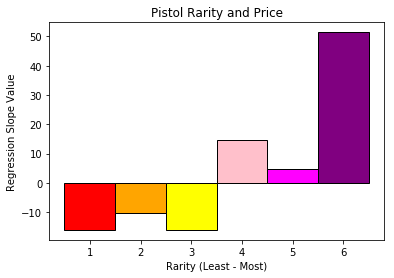

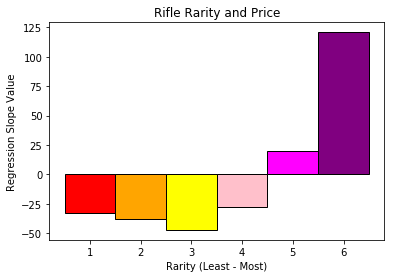

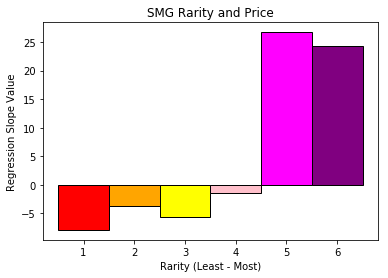

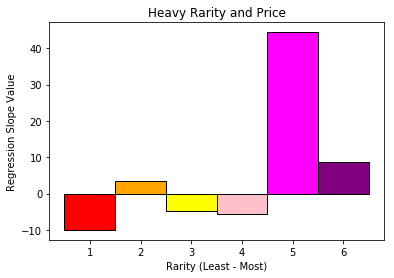

In [99]:
#Graphing Pistol Rarity
x = [pistol_consumergrade_model.coef_[0,0], pistol_industrialgrade_model.coef_[0,0], pistol_milspec_model.coef_[0,0], pistol_restricted_model.coef_[0,0], pistol_classified_model.coef_[0,0], pistol_covert_model.coef_[0,0]]
y = ["1", "2", "3", "4", "5", "6"]
plt.bar(y, x, width = 1, color= ['red', 'orange', 'yellow', 'pink', 'magenta', 'purple'], edgecolor = "black")
plt.title("Pistol Rarity and Price")
plt.xlabel("Rarity (Least - Most)")
plt.ylabel("Regression Slope Value")
plt.show()

#Graphing Rifle Rarity
x = [rifle_consumergrade_model.coef_[0,0], rifle_industrialgrade_model.coef_[0,0], rifle_milspec_model.coef_[0,0], rifle_restricted_model.coef_[0,0], rifle_classified_model.coef_[0,0], rifle_covert_model.coef_[0,0]]
y = ["1", "2", "3", "4", "5", "6"]
plt.bar(y, x, width = 1, color= ['red', 'orange', 'yellow', 'pink', 'magenta', 'purple'], edgecolor = "black")
plt.title("Rifle Rarity and Price")
plt.xlabel("Rarity (Least - Most)")
plt.ylabel("Regression Slope Value")
plt.show()

#Graphing SMG Rarity
x = [smg_consumergrade_model.coef_[0,0], smg_industrialgrade_model.coef_[0,0], smg_milspec_model.coef_[0,0], smg_restricted_model.coef_[0,0], smg_classified_model.coef_[0,0], smg_covert_model.coef_[0,0]]
y = ["1", "2", "3", "4", "5", "6"]
plt.bar(y, x, width = 1, color= ['red', 'orange', 'yellow', 'pink', 'magenta', 'purple'], edgecolor = "black")
plt.title("SMG Rarity and Price")
plt.xlabel("Rarity (Least - Most)")
plt.ylabel("Regression Slope Value")
plt.show()

#Graphing Heavy Rarity
x = [heavy_consumergrade_model.coef_[0,0], heavy_industrialgrade_model.coef_[0,0], heavy_milspec_model.coef_[0,0], heavy_restricted_model.coef_[0,0], heavy_classified_model.coef_[0,0], heavy_covert_model.coef_[0,0]]
y = ["1", "2", "3", "4", "5", "6"]
plt.bar(y, x, width = 1, color= ['red', 'orange', 'yellow', 'pink', 'magenta', 'purple'], edgecolor = "black")
plt.title("Heavy Rarity and Price")
plt.xlabel("Rarity (Least - Most)")
plt.ylabel("Regression Slope Value")
plt.show()

#Graphing Knife Rarity

#Nothing to graph - only covert weapons

**Section 2.3: Stattrak and Price**

In this section we analyze the StatTrak attribute of weapon skins. Essentially, StatTrak refers to a skin’s ability to track your performance in-game. Some skins have it and some don’t (standard skins). There are different variations of StatTrak in the game but we filtered our dataset to classify any form of StatTrak as “1” in that category, and any standard gun as a “0."

Following the prior models, we began by running a linear regression to find the regression coefficient of StatTrak to price, including all weapon types. The below result (~30.7) shows us there is a strong positive correlation between a skin having the StatTrak attribute and its price.

In [103]:
stattrak_model = LinearRegression().fit( weapons[['stattrak']], weapons[['price']])
print("StatTrak Slope Value:", stattrak_model.coef_[0,0])

StatTrak Slope Value: 30.659408198520538


We again ran linear regressions to see the correlation between StatTrak and price for each weapon type. Surprisingly, the heavies showed very little correlation between StatTrak and price (~0.1). While knives recorded a slope of ~60.1. This means that for some weapon types, StatTrak is likely a strong indicator of price.

In [104]:
pistol_and_stattrak = weapons[weapons.category == 'pistol']
rifle_and_stattrak = weapons[weapons.category == 'rifle']
smg_and_stattrak = weapons[weapons.category == 'smg']
heavy_and_stattrak = weapons[weapons.category == 'heavy']
knife_and_stattrak = weapons[weapons.category == 'knife']

In [105]:
pistol_stattrak_model = LinearRegression().fit( pistol_and_stattrak[['stattrak']], pistol_and_stattrak[['price']])
print("Pistol StatTrak Slope Value:", pistol_stattrak_model.coef_[0,0])

rifle_stattrak_model = LinearRegression().fit( rifle_and_stattrak[['stattrak']], rifle_and_stattrak[['price']])
print("Rifle StatTrak Slope Value:", rifle_stattrak_model.coef_[0,0])

smg_stattrak_model = LinearRegression().fit( smg_and_stattrak[['stattrak']], smg_and_stattrak[['price']])
print("SMG StatTrak Slope Value:", smg_stattrak_model.coef_[0,0])

heavy_stattrak_model = LinearRegression().fit( heavy_and_stattrak[['stattrak']], heavy_and_stattrak[['price']])
print("Heavy StatTrak Slope Value:", heavy_stattrak_model.coef_[0,0])

knife_stattrak_model = LinearRegression().fit( knife_and_stattrak[['stattrak']], knife_and_stattrak[['price']])
print("Knife StatTrak Slope Value:", knife_stattrak_model.coef_[0,0])

Pistol StatTrak Slope Value: 18.276192740264214
Rifle StatTrak Slope Value: 22.34925338347581
SMG StatTrak Slope Value: 3.6361757169587925
Heavy StatTrak Slope Value: 0.06556668734491114
Knife StatTrak Slope Value: 60.14449408666937


We decided to represent this graphically through a bar chart displaying the different weapon types and their corresponding StatTrak regression coefficient for predicting price. The higher a weapon type’s StatTrak coefficient, the more the attribute is correlated to price. 

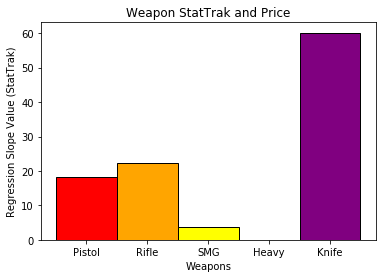

In [113]:
#Graphing Stattrak Across Weapon Categories
x = [pistol_stattrak_model.coef_[0,0], rifle_stattrak_model.coef_[0,0], smg_stattrak_model.coef_[0,0], heavy_stattrak_model.coef_[0,0], knife_stattrak_model.coef_[0,0]]
y = ["Pistol", "Rifle", "SMG", "Heavy", "Knife"]
plt.bar(y, x, width = 1, color= ['red', 'orange', 'yellow', 'pink', 'purple'], edgecolor = "black")
plt.title("Weapon StatTrak and Price")
plt.xlabel("Weapons")
plt.ylabel("Regression Slope Value (StatTrak)")
plt.show()

**Section 2.4: Quantity and Price**

The attribute quantity represents the amount of skins of a certain type on the market (as of May 6th, when we scraped the data). In this section, we will see how the quantity of weapons with a certain skin on the market correlates to its price.

When calculating the quantity regression correlation with price, all weapons included, we see a very small negative correlation. Intuitively, a negative value makes sense, as items on the market with limited availability are likely rarer, and thus have higher price. However, this correlation is very small. Even when breaking the slopes into the respective individual weapon types we see small values. This shows there is very little correlation between quantity as a predictor for price.

In [114]:
quantity_model = LinearRegression().fit( weapons[['quantity']], weapons[['price']])
print("Quantity Slope Value:", quantity_model.coef_[0,0])

Quantity Slope Value: -0.009384629820576619


In [115]:
pistol_and_quantity = weapons[weapons.category == 'pistol']
rifle_and_quantity = weapons[weapons.category == 'rifle']
smg_and_quantity = weapons[weapons.category == 'smg']
heavy_and_quantity = weapons[weapons.category == 'heavy']
knife_and_quantity = weapons[weapons.category == 'knife']

In [116]:
pistol_quantity_model = LinearRegression().fit( pistol_and_quantity[['quantity']], pistol_and_quantity[['price']])
print("Pistol Quantity Slope Value:", pistol_quantity_model.coef_[0,0])

rifle_quantity_model = LinearRegression().fit( rifle_and_quantity[['quantity']], rifle_and_quantity[['price']])
print("Rifle Quantity Slope Value:", rifle_quantity_model.coef_[0,0])

smg_quantity_model = LinearRegression().fit( smg_and_quantity[['quantity']], smg_and_quantity[['price']])
print("SMG Quantity Slope Value:", smg_quantity_model.coef_[0,0])

heavy_quantity_model = LinearRegression().fit( heavy_and_quantity[['quantity']], heavy_and_quantity[['price']])
print("Heavy Quantity Slope Value:", heavy_quantity_model.coef_[0,0])

knife_quantity_model = LinearRegression().fit( knife_and_quantity[['quantity']], knife_and_quantity[['price']])
print("Knife Quantity Slope Value:", knife_quantity_model.coef_[0,0])

Pistol Quantity Slope Value: -0.0017890859643625871
Rifle Quantity Slope Value: -0.0036909226599171224
SMG Quantity Slope Value: -0.0007548929442820771
Heavy Quantity Slope Value: -0.0010600710999886405
Knife Quantity Slope Value: -4.839081702799696


When trying to depict this graphically, there were issues. There are many outliers that cause the graphs’ original data to be hard to visualize. Furthermore, there are so many data points that have a quantity close to zero, and many points that have a price close to zero, that the graphs form “L” shapes that make the trend hard to see. Since the trends are similar between weapon types, we included the pistol graph, only. The second graph shown was “zoomed in” by changing the ranges of the x and y axes to visualize the trend better. As you can see, there is a negative correlation between quantity and price, however small. 

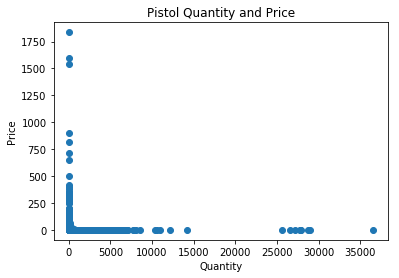

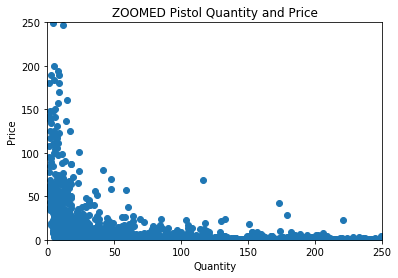

In [117]:
#Graphing Pistol and Quantity

plt.scatter(pistol_and_quantity['quantity'], pistol_and_quantity['price'])
plt.title("Pistol Quantity and Price")
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.show()

plt.scatter(pistol_and_quantity['quantity'], pistol_and_quantity['price'])
plt.title("ZOOMED Pistol Quantity and Price")
plt.xlim(0.0,250)
plt.xlabel('Quantity')
plt.ylim(0.0,250)
plt.ylabel('Price')
plt.show()

The model of quantity shows that it is different from the other attributes. This is likely because the quantity of a weapon may be dependent on the weapon’s other attributes, like rarity (rare = fewer drops from crates = lower quantity on the market). However, it seems that the weapons with high prices all have a low quantity, but this is offset by the many weapons with low prices and low quantities, which causes the correlation to be very small. Overall, it seems that quantity is dependent on other variables, which is why we see some skins with high prices at low quantities, and other skins with low prices at low quantities.

**Section 2.5: Weapon Type and Price**  

Based on the slopes displayed below, we can see how the category that a weapon falls into correlates with its price. While before we calculated how the other attributes’ correlations with price change depending on weapon type, we now want to see which weapon types, as a whole, are correlated with price. The knife model saw the highest coefficient, so we can infer that knives are among the most desirable weapons on the marketplace and fetch the highest price. Rifles are the second most desirable category of weapon on the market, followed by heavies, pistols, and SMGs. 

In [118]:
# Calculating the number of weapons in each category
weapons.groupby("category")["category"].count()

category
heavy     1089
knife     2513
pistol    2123
rifle     2348
smg       1457
Name: category, dtype: int64

In [119]:
# Creating dummy variables for weapon category
category_dummies = pd.get_dummies(weapons["category"])
#category_dummies.head()

In [120]:
# Separating columns of category_dummies
heavies = category_dummies['heavy']
knives = category_dummies['knife']
pistols = category_dummies['pistol']
rifles = category_dummies['rifle']
smgs = category_dummies['smg']

# Creating linear regression models
heavy_model = LinearRegression().fit(np.array(heavies).reshape(-1,1), weapons['price'])
knife_model = LinearRegression().fit(np.array(knives).reshape(-1,1), weapons['price'])
pistol_model = LinearRegression().fit(np.array(pistols).reshape(-1,1), weapons['price'])
rifle_model = LinearRegression().fit(np.array(rifles).reshape(-1,1), weapons['price'])
smg_model = LinearRegression().fit(np.array(smgs).reshape(-1,1), weapons['price'])

# Displaying slopes of each regression
print("Heavies:", heavy_model.coef_[0])
print("Knives:", knife_model.coef_[0])
print("Pistols:", pistol_model.coef_[0])
print("Rifles:", rifle_model.coef_[0])
print("SMGs:", smg_model.coef_[0])

Heavies: -96.90968171227775
Knives: 274.90222174491913
Pistols: -101.10398529264816
Rifles: -68.49790460914652
SMGs: -103.02027279472205


**Section 3: Attributes and Price by Weapon Type**

As of now, we have analyzed the data as a whole by viewing the averages in Section 1, and the correlation between each attribute and price in Section 2. The last piece of the puzzle is to see how the attributes within weapon types stack up against each other and determine which attributes matter most in determining price. Essentially, you could be able to tell whether for knives, for example, if quality is more important in determining skin price than StatTrak. Since we already have the coefficients of correlation between each attribute and price, we can put the data into five bar charts: one for each weapon type with the attribute on the x-axis (ignoring quantity since it is dependent on the other attributes) and the regression slope for predicting price on the y-axis.

Pistols Quality Slope: 7.258428676920982
Pistols Rarity Slope: 9.91060658763399
Pistols Stattrak Slope: 18.276192740264214


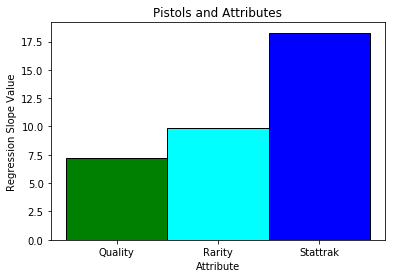

In [84]:
#Pistols

print("Pistols Quality Slope:", pistol_quality_model.coef_[0,0])
print("Pistols Rarity Slope:", pistol_rarity_model.coef_[0,0])
print("Pistols Stattrak Slope:", pistol_stattrak_model.coef_[0,0])

x = [pistol_quality_model.coef_[0,0], pistol_rarity_model.coef_[0,0], pistol_stattrak_model.coef_[0,0]]
y = ["Quality","Rarity", "Stattrak"]
plt.bar(y, x, width = 1, color= ['green', 'cyan', 'blue'], edgecolor = "black")
plt.title("Pistols and Attributes")
plt.xlabel("Attribute")
plt.ylabel("Regression Slope Value")
plt.show()

Rifles Quality Slope: 13.196115805484402
Rifles Rarity Slope: 25.920083935003607
Rifles Stattrak Slope: 22.34925338347581


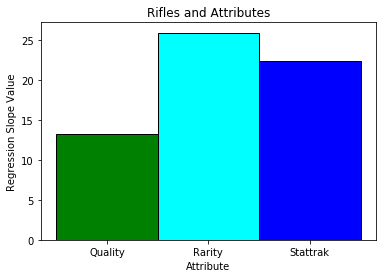

In [85]:
#Rifles

print("Rifles Quality Slope:", rifle_quality_model.coef_[0,0])
print("Rifles Rarity Slope:", rifle_rarity_model.coef_[0,0])
print("Rifles Stattrak Slope:", rifle_stattrak_model.coef_[0,0])

x = [rifle_quality_model.coef_[0,0], rifle_rarity_model.coef_[0,0], rifle_stattrak_model.coef_[0,0]]
y = ["Quality","Rarity", "Stattrak"]
plt.bar(y, x, width = 1, color= ['green', 'cyan', 'blue'], edgecolor = "black")
plt.title("Rifles and Attributes")
plt.xlabel("Attribute")
plt.ylabel("Regression Slope Value")
plt.show()

SMGs Quality Slope: 3.371793010331965
SMGs Rarity Slope: 5.448879084013615
SMGs Stattrak Slope: 3.6361757169587925


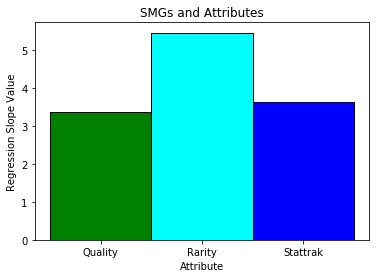

In [86]:
#SMGs

print("SMGs Quality Slope:", smg_quality_model.coef_[0,0])
print("SMGs Rarity Slope:", smg_rarity_model.coef_[0,0])
print("SMGs Stattrak Slope:", smg_stattrak_model.coef_[0,0])

x = [smg_quality_model.coef_[0,0], smg_rarity_model.coef_[0,0], smg_stattrak_model.coef_[0,0]]
y = ["Quality","Rarity", "Stattrak"]
plt.bar(y, x, width = 1, color= ['green', 'cyan', 'blue'], edgecolor = "black")
plt.title("SMGs and Attributes")
plt.xlabel("Attribute")
plt.ylabel("Regression Slope Value")
plt.show()

Heavies Quality Slope: 3.0392707340324137
Heavies Rarity Slope: 5.491451141265535
Heavies Stattrak Slope: 0.06556668734491114


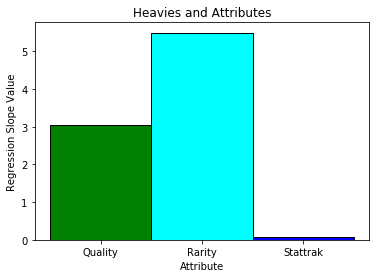

In [87]:
#Heavies

print("Heavies Quality Slope:", heavy_quality_model.coef_[0,0])
print("Heavies Rarity Slope:", heavy_rarity_model.coef_[0,0])
print("Heavies Stattrak Slope:", heavy_stattrak_model.coef_[0,0])

x = [heavy_quality_model.coef_[0,0], heavy_rarity_model.coef_[0,0], heavy_stattrak_model.coef_[0,0]]
y = ["Quality","Rarity", "Stattrak"]
plt.bar(y, x, width = 1, color= ['green', 'cyan', 'blue'], edgecolor = "black")
plt.title("Heavies and Attributes")
plt.xlabel("Attribute")
plt.ylabel("Regression Slope Value")
plt.show()

Knives Quality Slope: 66.3694763321295
Knives Rarity Slope: 0.0
Knives Stattrak Slope: 60.14449408666937


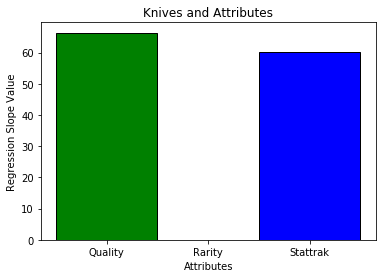

In [88]:
#Knives

print("Knives Quality Slope:", knife_quality_model.coef_[0,0])
print("Knives Rarity Slope:", knife_rarity_model.coef_[0,0])
print("Knives Stattrak Slope:", knife_stattrak_model.coef_[0,0])

x = [knife_quality_model.coef_[0,0], knife_rarity_model.coef_[0,0], knife_stattrak_model.coef_[0,0]]
y = ["Quality","Rarity", "Stattrak"]
plt.bar(y, x, width = 1, color= ['green', 'cyan', 'blue'], edgecolor = "black")
plt.title("Knives and Attributes")
plt.xlabel("Attributes")
plt.ylabel("Regression Slope Value")
plt.show()

If you combine all the models from the data analysis section, you can determine which weapons are likely to be the most “expensive” based on the data. We will discuss this more in the conclusion section.

# Part IV: Evaluation of Significance

In order to test our Linear Regression models, we used the y-permutation technique we learned in Homework 8 to evaluate the significance of our models. First, this method takes in a model, its x values, and its y values. Then, it generates 1000 different permutations of how the y values could have been ordered. For each y-value permutation, this method creates a Linear Regression model using the input X values and logs what the permuted model’s slope is. Once the method has accumulated 1000 different slopes of permuted y-values, it compares these slopes to our Linear Regression model’s slope. This works well as a confidence test because if a high number of these randomly generated slopes are steeper than our own model, then it may indicate that the relationship between our X and Y values are not very unique and could be just the result of random correlation. However, if there are few or no permuted slopes that are higher than our model’s, then it shows how incredibly unlikely it is that our model is the result of a relationship that occured randomly. As you can see below, all four attribute models returned with no steeper slopes, telling us the data is not likely to be a coincidence of random chance.

In [89]:
def _permute(c):
    return np.random.permutation(c.copy())

def y_permutation(model,x,y):
    steeper_slopes = 0
    permutations = np.zeros(1000)
    for i in range(0,len(permutations)):
        new_y = _permute(y)
        m = LinearRegression().fit(x, new_y.reshape(-1,1))
        permutations[i] = m.coef_
        if np.abs(permutations[i]) > np.abs(model.coef_):
            steeper_slopes = steeper_slopes+1
    plt.hist(permutations, bins=30)
    plt.show()
    return steeper_slopes

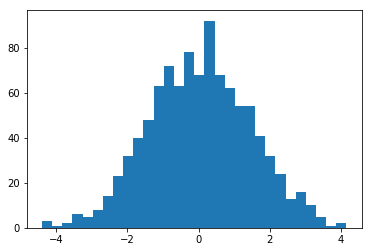

There are  0 randomly permutated slopes that are steeper.


In [90]:
print("There are ", y_permutation(quality_model, weapons[['quality']], weapons[['price']]), "randomly permutated slopes that are steeper.")

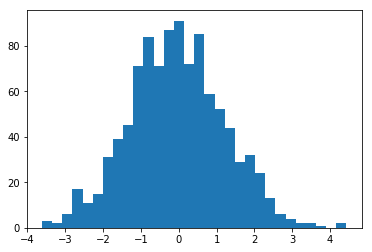

There are  0 randomly permutated slopes that are steeper.


In [91]:
print("There are ", y_permutation(rarity_model, weapons[['rarity']], weapons[['price']]), "randomly permutated slopes that are steeper.")

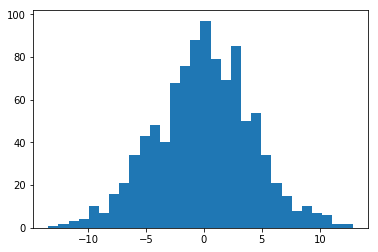

There are  0 randomly permutated slopes that are steeper.


In [92]:
print("There are ", y_permutation(rarity_model, weapons[['stattrak']], weapons[['price']]), "randomly permutated slopes that are steeper.")

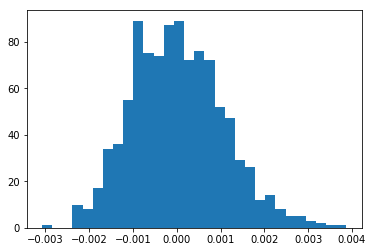

There are  0 randomly permutated slopes that are steeper.


In [93]:
print("There are ", y_permutation(quantity_model, weapons[['quantity']], weapons[['price']]), "randomly permutated slopes that are steeper.")

# Part V: Conclusion

Over the course of our data analysis, we discovered some unexpected results that seem to be strongly supported by our findings. From the outset of this project, we expected the highest tier of all weapon attributes to be correlated with the greatest increase in price, but upon closer analysis, we’ve found that this is not only incorrect, but as shown in Section 3, different attributes have significantly varied correlations with price depending on weapon type. For example, while StatTrak is highly correlated with price for most weapon types, while the heavy category shows almost no correlation. Furthermore, in Section 2.5 we determined which weapon types were the most valuable based on our linear regression model, where knives proved much more expensive than other weapons. Combining this information with Sections 2.1-2.4, you could determine which skins are likely to fetch a high price on the market, by analyzing the skins’ attributes, before they hit the market. Given the thousands of dollars spent on items and massive volume exchanged every day, our findings could be used to devise a market strategy for sellings items at a profit by predicting the price of new skins before they are released or determining if certain items are undervalued. In the end, we found that in theory, the most expensive skins per weapon type, and their attributes would resemble (in order of most valuable to least, with attributes in order of most to least important on price determination):

- Knife -- Quality: 5, StatTrak, Rarity: 6
- Rifle -- Rarity: 6, StatTrak, Quality: 5
- Heavy -- Rarity: 5, Quality: 5, StatTrak
- Pistol -- StatTrak, Rarity: 6, Quality: 5
- SMG -- Rarity: 5, StatTrak, Quality: 5


# Part VI: Source Code

Our github link is: https://github.com/cdw66/info-2950-final-project.

This repository is divided into different folders that organize our files and datasets. We’ve kept all the essential source code files so that one could download our project and replicate our entire process from data-scraping to running our linear regression models. Thus, the organization of our repository also illustrates the different phases our project went through. The folder titled “html-data-scraping” contains all of the HTML files we downloaded to scrape our data in our project’s initial phase. Each HTML page represents every skin for one weapon item in the game. The file “list-printer.ipynb” in this folder takes in all of these HTML files, finds the data we wanted, and compiles it into a CSV file titled “dataset.csv”. We placed the product of this initial phase, “dataset.csv”, into a separate folder where we broke it up and cleaned it. This folder is titled “datasets-and-data-cleaning”.  It contains “average-price-dataset-cleaner.ipynb” which takes in the original dataset, cleans it, and creates a new dataset called “average-price-data-clean.csv”. Similarly, the file “categorical-dataset-cleaner.ipynb” takes in the original dataset file, cleans it, and creates a new dataset called “categorical-data-clean.csv”. Both of these new CSV files are what we used in our final models for linear regression and data analysis.

# Part VII: Acknowledgements

With a large project comes a lot of code, and we couldn’t have done it entirely ourselves. We referenced sources below to help us in our analysis:

- https://stackoverflow.com/questions/51004029/create-a-new-dataframe-based-on-rows-with-a-certain-value

- https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe

- https://benalexkeen.com/bar-charts-in-matplotlib/

- https://python-graph-gallery.com/3-control-color-of-barplots/

- https://seaborn.pydata.org/tutorial/relational.html

- Homework 7

- Homework 8

We acknowledge that our final submission has a high word count -- we went through many hours of editing and cutting down our write-up which helped significantly, but reducing our word count any more would sacrifice important aspects of our analysis.
